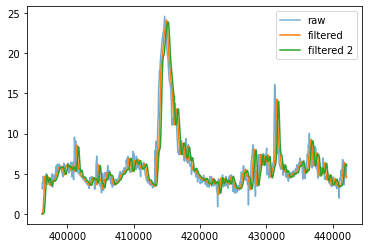

In [33]:
import numpy as np
import matplotlib.pyplot as plt

time, B0 = [], []
with open("sc_merge_min_Izr3EDhIyN.lst", "r") as file:
    file_read = np.loadtxt(file)
#     time = np.zeros(len(file_read))
#     B0 = np.zeros_like(time)
#     By = np.zeros_like(time)
#     Bz = np.zeros_like(time)
    for i in range(len(file_read)):
        if(np.abs(file_read[i,4]) < 100):
            time.append((60*(24*file_read[i,1] + file_read[i,2]) + file_read[i,3]))
            B0.append(file_read[i,4])
        
    num_sample = 1000
    time_arr = np.linspace(np.min(time),np.max(time),num_sample)
    fs = num_sample / (np.max(time)-np.min(time))
    order = 6
    cutoff = 0.1*fs  # desired cutoff frequency of the filter, Hz
    
    
    from scipy import interpolate
    from scipy.signal import butter, lfilter, freqz
    
    
    
    data_of_t = interpolate.interp1d(np.array(time),np.array(data))
    data_arr = data_of_t(time_arr)
    
    
    plt.plot(time_arr,data_arr,alpha=0.6,label="raw")
    
    
    
    def butter_lowpass(cutoff, fs, order=5):
        return butter(order, cutoff, fs=fs, btype='low', analog=False)

    def butter_lowpass_filter(data, cutoff, fs, order=5):
        b, a = butter_lowpass(cutoff, fs, order=order)
        y = lfilter(b, a, data)
        return y
    
    b, a = butter_lowpass(cutoff, fs, order)
    data_filter  = butter_lowpass_filter(data_arr, cutoff,fs)
    plt.plot(time_arr,data_filter,label="filtered")

    plt.legend()
    
    print(B0_filter2)
#     time = (60*(24*file_read[:,1]) + file_read[:,2]) + file_read[:,3]
#     B0   = file_read[:,4]
#     By   = file_read[:,5]
#     Bz   = file_read[:,6]
    
#     plt.plot(time,B0)
#     plt.ylim(0,10)